In [1]:
using Distances, DataFrames, Color, Gadfly, Distributions, Interact, Reactive

include("TaxonomyExample.jl")
include("BlahutArimoto.jl")
include("InformationTheoryFunctions.jl")
include("ConversionFunctions.jl")
include("VisualizationFunctions.jl")
include("ThreeVariableBlahutArimoto.jl")

#make the default plot size a bit larger
set_default_plot_size(15cm, 12cm)

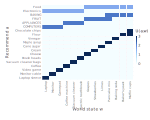

In [2]:
#set up taxonomy example
include("TaxonomyExample.jl")
w_vec, w_strings, a_vec, a_strings, p_w, U = setuptaxonomy()


#pre-compute utilities, find maxima
U_pre, Umax = setuputilityarrays(a_vec,w_vec,U)

#visualize utility
plt_utility = visualizeMatrix(U_pre, w_vec, a_vec, w_strings, a_strings, xlabel="World state w",
                              ylabel="Recommend a", legendlabel="U(a,w)")

In [3]:
#sequential
#β1 = 10 #inverse temperature for p(o)→p(o|w)
#β2 = 10 #inverse temperature for p(a)→p(a|o)
#β3 = 4 #inverse temperature for p(a|o)→p(a|o,w)

#oscillating!
#β1=β3 and β2≫ is identical to the one-variable case
#β1 = 2 #inverse temperature for p(o)→p(o|w)
#β2 = 20000 #inverse temperature for p(a)→p(a|o)
#β3 = 2 #inverse temperature for p(a|o)→p(a|o,w)

#parallel
β1 = 2 #inverse temperature for p(o)→p(o|w)
β2 = 20000 #inverse temperature for p(a)→p(a|o)
β3 = 0.01 #inverse temperature for p(a|o)→p(a|o,w)

#initialize randomly vs. uniformly in the parallel case with β1=β3
#leads to two qualitatively different solutions that have the same p(a|w), I(A;W) and
#E[U] and objective value compared to the single-variable case.
#This indicates that the optimal solution to the objective is no longer unique!

#sequential case: β3 is low (lower than the other two)
#parallel case: β2 is high

ε = 0.0000001 #convergence critetion for BAiterations
maxiter = 2000 #maximum number of BA iterations

#cardinality of percept
num_obs = length(a_vec) #cardinality of percept is equal to action-space
o_vec = [1:num_obs]
o_strings = map((x)->"o"*string(x), o_vec)

#initialize p(o|w) and p(a|o,w) uniformly (or randomly)?
uniform_init = false

#This function performs Blahut-Arimoto iterations for the three-variable general case
po, pa, pogw, pago, pagow, pagw, performance_df = threevarBAiterations(num_obs, β1, β2, β3, U_pre, p_w, ε, maxiter,
                                                  compute_performance=true, performance_per_iteration=true,
                                                  performance_as_dataframe=true, init_uniformly=uniform_init);

In [4]:
#plot convergence (i.e. evolution across BA iterations)
plot_convergence_MI, plot_convergence_Util = plot_three_var_BA_convergence(performance_df);

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 
 
 Objective J 
 
 
 
 
 
 
 
 E[U] 
 
 
 
 
 
 
 
 
 
 
 Iteration 
 
 
 -2500 
 -2000 
 -1500 
 -1000 
 -500 
 0 
 500 
 1000 
 1500 
 2000 
 2500 
 3000 
 3500 
 4000 
 4500 
 -2000 
 -1900 
 -1800 
 -1700 
 -1600 
 -1500 
 -1400 
 -1300 
 -1200 
 -1100 
 -1000 
 -900 
 -800 
 -700 
 -600 
 -500 
 -400 
 -300 
 -200 
 -100 
 0 
 100 
 200 
 300 
 400 
 500 
 600 
 700 
 800 
 900 
 1000 
 1100 
 1200 
 1300 
 1400 
 1500 
 1600 
 1700 
 1800 
 1900 
 2000 
 2100 
 2200 
 2300 
 2400 
 2500 
 2600 
 2700 
 2800 
 2900 
 3000 
 3100 
 3200 
 3300 
 3400 
 3500 
 3600 
 3700 
 3800 
 3900 
 4000 
 -2000 
 0 
 2000 
 4000 
 -2000 
 -1800 
 -1600 
 -1400 
 -1200 
 -1000 
 -800 
 -600 
 -400 
 -200 
 0 
 200 
 400 
 600 
 800 
 1000 
 1200 
 1400 
 1600 
 1800 
 2000 
 2200 
 2400 
 2600 
 2800 
 3000 
 3200 
 3400 
 3600 
 3800 
 4000 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path fill="none" d="M21.9,71.65 L 21.96 71.74 22.02 71.74 22.08 71.73 22.14 71.73 22.2 71.73 22.26 71.72 22.32 71.72 22.39 71.72 22.45 71.71 22.51 71.71 22.57 71.71 22.63 71.7 22.69 71.7 22.75 71.7 22.81 71.69 22.87 71.69 22.93 71.69 22.99 71.68 23.05 71.68 23.11 71.67 23.17 71.67 23.23 71.67 23.29 71.66 23.35 71.66 23.42 71.66 23.48 71.65 23.54 71.65 23.6 71.65 23.66 71.64 23.72 71.64 23.78 71.63 23.84 71.63 23.9 71.63 23.96 71.62 24.02 71.62 24.08 71.62 24.14 71.61 24.2 71.61 24.26 71.6 24.32 71.6 24.38 71.6 24.44 71.59 24.51 71.59 24.57 71.59 24.63 71.58 24.69 71.58 24.75 71.57 24.81 71.57 24.87 71.57 24.93 71.56 24.99 71.56 25.05 71.56 25.11 71.55 25.17 71.55 25.23 71.54 25.29 71.54 25.35 71.54 25.41 71.53 25.47 71.53 25.54 71.53 25.6 71.52 25.66 71.52 25.72 71.51 25.78 71.51 25.84 71.51 25.9 71.5 25.96 71.5 26.02 71.49 26.08 71.49 26.14 71.49 26.2 71.48 26.26 71.48 26.32 71.47 26.38 71.47 26.44 71.47 26.5 71.46 26.57 71.46 26.63 71.45 26.69 71.45 26.75 71.45 26.81 71.44 26.87 71.44 26.93 71.43 26.99 71.43 27.05 71.43 27.11 71.42 27.17 71.42 27.23 71.41 27.29 71.41 27.35 71.41 27.41 71.4 27.47 71.4 27.53 71.39 27.6 71.39 27.66 71.39 27.72 71.38 27.78 71.38 27.84 71.37 27.9 71.37 27.96 71.37 28.02 71.36 28.08 71.36 28.14 71.35 28.2 71.35 28.26 71.35 28.32 71.34 28.38 71.34 28.44 71.33 28.5 71.33 28.56 71.32 28.62 71.32 28.69 71.32 28.75 71.31 28.81 71.31 28.87 71.3 28.93 71.3 28.99 71.3 29.05 71.29 29.11 71.29 29.17 71.28 29.23 71.28 29.29 71.27 29.35 71.27 29.41 71.27 29.47 71.26 29.53 71.26 29.59 71.25 29.65 71.25 29.72 71.25 29.78 71.24 29.84 71.24 29.9 71.23 29.96 71.23 30.02 71.22 30.08 71.22 30.14 71.22 30.2 71.21 30.26 71.21 30.32 71.2 30.38 71.2 30.44 71.19 30.5 71.19 30.56 71.19 30.62 71.18 30.68 71.18 30.75 71.17 30.81 71.17 30.87 71.16 30.93 71.16 30.99 71.16 31.05 71.15 31.11 71.15 31.17 71.14 31.23 71.14 31.29 71.13 31.35 71.13 31.41 71.13 31.47 71.12 31.53 71.12 31.59 71.11 31.65 71.11 31.71 71.1 31.78 71.1 31.84 71.09 31.9 71.09 31.96 71.09 32.02 71.08 32.08 71.08 32.14 71.07 32.2 71.07 32.26 71.06 32.32 71.06 32.38 71.06 32.44 71.05 32.5 71.05 32.56 71.04 32.62 71.04 32.68 71.03 32.74 71.03 32.8 71.02 32.87 71.02 32.93 71.02 32.99 71.01 33.05 71.01 33.11 71 33.17 71 33.23 70.99 33.29 70.99 33.35 70.98 33.41 70.98 33.47 70.98 33.53 70.97 33.59 70.97 33.65 70.96 33.71 70.96 33.77 70.95 33.83 70.95 33.9 70.94 33.96 70.94 34.02 70.94 34.08 70.93 34.14 70.93 34.2 70.92 34.26 70.92 34.32 70.91 34.38 70.91 34.44 70.9 34.5 70.9 34.56 70.9 34.62 70.89 34.68 70.89 34.74 70.88 34.8 70.88 34.86 70.87 34.93 70.87 34.99 70.86 35.05 70

In [5]:
#Check whether different initializations lead to the same solution

#Check whether producing the different special-cases works! (perhaps the random initialization
#leads to problems for the sequential case, since the weight for I(A;W|O) is very large,
#leading to p(a|o)=p(a|o,w), but the initial solutions violate this condition?)
#If producing the special cases by simply setting the temperature properly doesn't work, implement
#the sequential and parallel case as well! (in that case try to write visualization functions that
#can handle any of the cases)

#TODO: when initializing randomly, can it be that inconsistencies between p(o|w) and p(a|o,w) cause problems?

#TODO: the uniform initialization also seems to be problematic... perhaps it's too symmetric?

#Another reason for the NaNs could be that entries in distributions are driven to 0, which then 
#causes problems with the D_KL: either add some ϵ, or rewrite the D_KL to handle these cases.
#In case of the latter solution also make sure to take care of the log-ratio in the second update equation for 
#the general case.

In [6]:
#call the routine that creates plots for all the probability distributions
plt_po, plt_pa, plt_pogw, plt_pago, plt_pagw, dpdown, plt_pagow_vis = visualize_three_var_BAsolution(po, pa,
                                                                      pogw, pago, pagow, pagw,
                                                                      o_vec, a_vec, w_vec,
                                                                      o_strings, a_strings, w_strings, 
                                                                      olabel_string="o", alabel_string="a", wlabel_string="w")

#visualize p(o) and p(a)
display(hstack(plt_po,plt_pa))

#visualize p(o|w)
display(plt_pogw)
#visualize p(a|o)
display(plt_pago)

#visualize p(a|w)
display(plt_pagw)

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 
 0.5 
 0.0 
 1.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p*(a) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Laptop sleeve 
 Monitor cable 
 Video game 
 Coffee 
 Vacuum cleaner bags 
 Brush heads 
 Cheese 
 Cream 
 Cane sugar 
 Maple syrup 
 Vinegar 
 Flour 
 Chocolate chips 
 COMPUTERS 
 APPLIANCES 
 FRUIT 
 BAKING 
 Electronics 
 Food 
 
 
 Action a 
 
 
 
 
 
 0.5 
 0.0 
 1.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p*(o) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 o1 
 o2 
 o3 
 o4 
 o5 
 o6 
 o7 
 o8 
 o9 
 o10 
 o11 
 o12 
 o13 
 o14 
 o15 
 o16 
 o17 
 o18 
 o19 
 
 
 Observation o

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 World state w 
 
 
 Laptop 
 Monitor 
 Gamepad 
 Coffee machine 
 Vacuum cleaner 
 Electric toothbrush 
 Grapes 
 Strawberries 
 Limes 
 Pancake mix 
 Baking soda 
 Baker's yeast 
 Muffin cups 
 
 
 
 0.5 
 0.0 
 1.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p*(o|w) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 o1 
 o2 
 o3 
 o4 
 o5 
 o6 
 o7 
 o8 
 o9 
 o10 
 o11 
 o12 
 o13 
 o14 
 o15 
 o16 
 o17 
 o18 
 o19 
 
 
 Observation o

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 Observation o 
 
 
 o1 
 o2 
 o3 
 o4 
 o5 
 o6 
 o7 
 o8 
 o9 
 o10 
 o11 
 o12 
 o13 
 o14 
 o15 
 o16 
 o17 
 o18 
 o19 
 
 
 
 0.5 
 0.0 
 1.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p*(a|o) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Laptop sleeve 
 Monitor cable 
 Video game 
 Coffee 
 Vacuum cleaner bags 
 Brush heads 
 Cheese 
 Cream 
 Cane sugar 
 Maple syrup 
 Vinegar 
 Flour 
 Chocolate chips 
 COMPUTERS 
 APPLIANCES 
 FRUIT 
 BAKING 
 Electronics 
 Food 
 
 
 Action a

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 World state w 
 
 
 Laptop 
 Monitor 
 Gamepad 
 Coffee machine 
 Vacuum cleaner 
 Electric toothbrush 
 Grapes 
 Strawberries 
 Limes 
 Pancake mix 
 Baking soda 
 Baker's yeast 
 Muffin cups 
 
 
 
 0.5 
 0.0 
 1.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p*(a|w) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Laptop sleeve 
 Monitor cable 
 Video game 
 Coffee 
 Vacuum cleaner bags 
 Brush heads 
 Cheese 
 Cream 
 Cane sugar 
 Maple syrup 
 Vinegar 
 Flour 
 Chocolate chips 
 COMPUTERS 
 APPLIANCES 
 FRUIT 
 BAKING 
 Electronics 
 Food 
 
 
 Action a

Options{:Dropdown,ASCIIString}([Input{ASCIIString}] Laptop,"World state w","Laptop","Laptop",OptionDict({"Laptop","Monitor","Gamepad","Coffee machine","Vacuum cleaner","Electric toothbrush","Grapes","Strawberries","Limes","Pancake mix","Baking soda","Baker's yeast","Muffin cups"},{"Limes"=>"Limes","Strawberries"=>"Strawberries","Baking soda"=>"Baking soda","Muffin cups"=>"Muffin cups","Gamepad"=>"Gamepad","Electric toothbrush"=>"Electric toothbrush","Monitor"=>"Monitor","Pancake mix"=>"Pancake mix","Coffee machine"=>"Coffee machine","Laptop"=>"Laptop","Vacuum cleaner"=>"Vacuum cleaner","Grapes"=>"Grapes","Baker's yeast"=>"Baker's yeast"}))

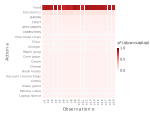

In [7]:
#visualize p(a|o,w)
display(dpdown)  #show the dropdown box to interactively select wk in p(a|o,w=wk)
display(plt_pagow_vis)

#TODO: rather than the number, use the string here for the dropdown (if provided)

In [8]:
p_MI, p_composed, p_perf=plot_three_var_performancemeasures(performance_df, maximum(U_pre))

display(hstack(p_MI, p_composed))
display(p_perf)

#TODO: for 
    #β1 = 8 #inverse temperature for p(o)→p(o|w)
    #β2 = 5 #inverse temperature for p(a)→p(a|o)
    #β3 = 2 #inverse temperature for p(a|o)→p(a|o,w)
#the entropy H(O|W) can't be that large - check for errors, there must be some I(O;W) as well, it can't be zero!


<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 H(O) 
 H(A) 
 H(A|O) 
 H(A) 
 
 
 
 I(O;W) 
 I(A;O) 
 I(A;W|O) 
 I(A;W) 
 H(O|W) 
 H(A|O) 
 H(A|O,W) 
 H(A|W) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -3.0 
 -2.5 
 -2.0 
 -1.5 
 -1.0 
 -0.5 
 0.0 
 0.5 
 1.0 
 1.5 
 2.0 
 2.5 
 3.0 
 3.5 
 4.0 
 4.5 
 5.0 
 5.5 
 -2.5 
 -2.4 
 -2.3 
 -2.2 
 -2.1 
 -2.0 
 -1.9 
 -1.8 
 -1.7 
 -1.6 
 -1.5 
 -1.4 
 -1.3 
 -1.2 
 -1.1 
 -1.0 
 -0.9 
 -0.8 
 -0.7 
 -0.6 
 -0.5 
 -0.4 
 -0.3 
 -0.2 
 -0.1 
 0.0 
 0.1 
 0.2 
 0.3 
 0.4 
 0.5 
 0.6 
 0.7 
 0.8 
 0.9 
 1.0 
 1.1 
 1.2 
 1.3 
 1.4 
 1.5 
 1.6 
 1.7 
 1.8 
 1.9 
 2.0 
 2.1 
 2.2 
 2.3 
 2.4 
 2.5 
 2.6 
 2.7 
 2.8 
 2.9 
 3.0 
 3.1 
 3.2 
 3.3 
 3.4 
 3.5 
 3.6 
 3.7 
 3.8 
 3.9 
 4.0 
 4.1 
 4.2 
 4.3 
 4.4 
 4.5 
 4.6 
 4.7 
 4.8 
 4.9 
 5.0 
 -2.5 
 0.0 
 2.5 
 5.0 
 -2.6 
 -2.4 
 -2.2 
 -2.0 
 -1.8 
 -1.6 
 -1.4 
 -1.2 
 -1.0 
 -0.8 
 -0.6 
 -0.4 
 -0.2 
 0.0 
 0.2 
 0.4 
 0.6 
 0.8 
 1.0 
 1.2 
 1.4 
 1.6 
 1.8 
 2.0 
 2.2 
 2.4 
 2.6 
 2.8 
 3.0 
 3.2 
 3.4 
 3.6 
 3.8 
 4.0 
 4.2 
 4.4 
 4.6 
 4.8 
 5.0 
 
 
 [bits] 
 
 
 Composition of entropic terms 
 
 
 
 
 I(O;W) 
 I(A;O) 
 I(A;W|O) 
 I(A;W) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -0.004 
 -0.003 
 -0.002 
 -0.001 
 0.000 
 0.001 
 0.002 
 0.003 
 0.004 
 0.005 
 0.006 
 0.007 
 -0.0030 
 -0.0029 
 -0.0028 
 -0.0027 
 -0.0026 
 -0.0025 
 -0.0024 
 -0.0023 
 -0.0022 
 -0.0021 
 -0.0020 
 -0.0019 
 -0.0018 
 -0.0017 
 -0.0016 
 -0.0015 
 -0.0014 
 -0.0013 
 -0.0012 
 -0.0011 
 -0.0010 
 -0.0009 
 -0.0008 
 -0.0007 
 -0.0006 
 -0.0005 
 -0.0004 
 -0.0003 
 -0.0002 
 -0.0001 
 0.0000 
 0.0001 
 0.0002 
 0.0003 
 0.0004 
 0.0005 
 0.0006 
 0.0007 
 0.0008 
 0.0009 
 0.0010 
 0.0011 
 0.0012 
 0.0013 
 0.0014 
 0.0015 
 0.0016 
 0.0017 
 0.0018 
 0.0019 
 0.0020 
 0.0021 
 0.0022 
 0.0023 
 0.0024 
 0.0025 
 0.0026 
 0.0027 
 0.0028 
 0.0029 
 0.0030 
 0.0031 
 0.0032 
 0.0033 
 0.0034 
 0.0035 
 0.0036 
 0.0037 
 0.0038 
 0.0039 
 0.0040 
 0.0041 
 0.0042 
 0.0043 
 0.0044 
 0.0045 
 0.0046 
 0.0047 
 0.0048 
 0.0049 
 0.0050 
 0.0051 
 0.0052 
 0.0053 
 0.0054 
 0.0055 
 0.0056 
 0.0057 
 0.0058 
 0.0059 
 0.0060 
 -0.003 
 0.000 
 0.003 
 0.006 
 -0.0030 
 -0.0028 
 -0.0026 
 -0.0024 
 -0.0022 
 -0.0020 
 -0.0018 
 -0.0016 
 -0.0014 
 -0.0012 
 -0.0010 
 -0.0008 
 -0.0006 
 -0.0004 
 -0.0002 
 0.0000 
 0.0002 
 0.0004 
 0.0006 
 0.0008 
 0.0010 
 0.0012 
 0.0014 
 0.0016 
 0.0018 
 0.0020 
 0.0022 
 0.0024 
 0.0026 
 0.0028 
 0.0030 
 0.0032 
 0.0034 
 0.0036 
 0.0038 
 0.0040 
 0.0042 
 0.0044 
 0.0046 
 0.0048 
 0.0050 
 0.0052 
 0.0054 
 0.0056 
 0.0058 
 0.0060 
 
 
 [bits] 
 
 
 Mutual information terms

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 E[U] 
 J = E[U] - 1/β ∑ I 
 
 
 
 E[U] 
 J = E[U] - 1/β ∑ I 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -4 
 -3 
 -2 
 -1 
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 -3.0 
 -2.9 
 -2.8 
 -2.7 
 -2.6 
 -2.5 
 -2.4 
 -2.3 
 -2.2 
 -2.1 
 -2.0 
 -1.9 
 -1.8 
 -1.7 
 -1.6 
 -1.5 
 -1.4 
 -1.3 
 -1.2 
 -1.1 
 -1.0 
 -0.9 
 -0.8 
 -0.7 
 -0.6 
 -0.5 
 -0.4 
 -0.3 
 -0.2 
 -0.1 
 0.0 
 0.1 
 0.2 
 0.3 
 0.4 
 0.5 
 0.6 
 0.7 
 0.8 
 0.9 
 1.0 
 1.1 
 1.2 
 1.3 
 1.4 
 1.5 
 1.6 
 1.7 
 1.8 
 1.9 
 2.0 
 2.1 
 2.2 
 2.3 
 2.4 
 2.5 
 2.6 
 2.7 
 2.8 
 2.9 
 3.0 
 3.1 
 3.2 
 3.3 
 3.4 
 3.5 
 3.6 
 3.7 
 3.8 
 3.9 
 4.0 
 4.1 
 4.2 
 4.3 
 4.4 
 4.5 
 4.6 
 4.7 
 4.8 
 4.9 
 5.0 
 5.1 
 5.2 
 5.3 
 5.4 
 5.5 
 5.6 
 5.7 
 5.8 
 5.9 
 6.0 
 -3 
 0 
 3 
 6 
 -3.0 
 -2.8 
 -2.6 
 -2.4 
 -2.2 
 -2.0 
 -1.8 
 -1.6 
 -1.4 
 -1.2 
 -1.0 
 -0.8 
 -0.6 
 -0.4 
 -0.2 
 0.0 
 0.2 
 0.4 
 0.6 
 0.8 
 1.0 
 1.2 
 1.4 
 1.6 
 1.8 
 2.0 
 2.2 
 2.4 
 2.6 
 2.8 
 3.0 
 3.2 
 3.4 
 3.6 
 3.8 
 4.0 
 4.2 
 4.4 
 4.6 
 4.8 
 5.0 
 5.2 
 5.4 
 5.6 
 5.8 
 6.0 
 
 
 [utils]

In [9]:
#for the paper
#hstack(p_MI, p_composed, p_perf)